In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Configuración de semilla para reproducibilidad
np.random.seed(42)

# Generación del dataset simulado
n_estaciones = 100

In [3]:
# Generación de variables
estacion_id = np.arange(1, n_estaciones + 1)
latitud = np.random.uniform(-34.0, -33.0, n_estaciones)
longitud = np.random.uniform(-58.0, -57.0, n_estaciones)
densidad_poblacional = np.random.uniform(5000, 20000, n_estaciones)
ingreso_promedio = np.random.uniform(1000, 5000, n_estaciones)
conexiones = np.random.randint(1, 6, n_estaciones)
indice_socioeconomico = np.random.randint(1, 6, n_estaciones)

In [4]:
# Creación del DataFrame
data = pd.DataFrame({
    'estacion_id': estacion_id,
    'latitud': latitud,
    'longitud': longitud,
    'densidad_poblacional': densidad_poblacional,
    'ingreso_promedio': ingreso_promedio,
    'conexiones': conexiones,
    'indice_socioeconomico': indice_socioeconomico
})

In [5]:
# Preparación de datos para clustering
features_cluster = ['densidad_poblacional', 'ingreso_promedio', 'conexiones', 'indice_socioeconomico']
X_cluster = data[features_cluster]

In [6]:
# Estandarización de las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [7]:
# Aplicación del algoritmo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

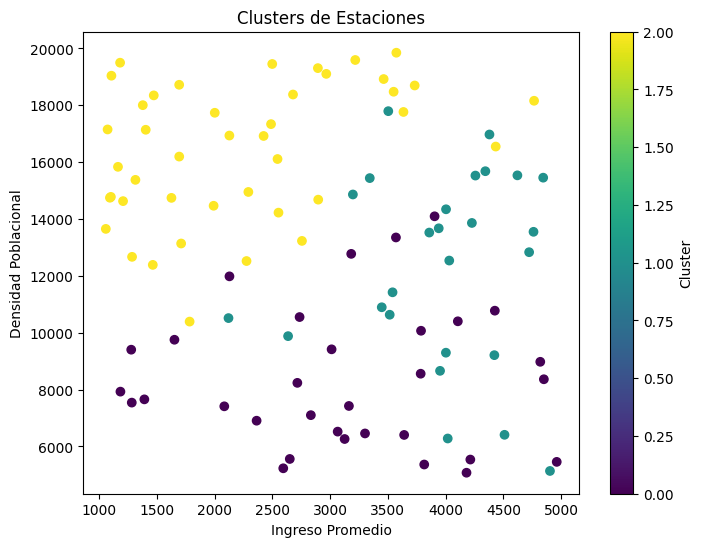

In [8]:
# Visualización de los clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['ingreso_promedio'], data['densidad_poblacional'], c=data['cluster'], cmap='viridis')
plt.xlabel('Ingreso Promedio')
plt.ylabel('Densidad Poblacional')
plt.title('Clusters de Estaciones')
plt.colorbar(label='Cluster')
plt.show()